### Labb Dataprocessing



In [86]:
import pandas as pd
import matplotlib.pyplot as plt


college = pd.read_csv("Data/College.csv")

print(college)

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [87]:
college2 = pd.read_csv ("Data/College.csv" , index_col =0)
college3 = college.rename ({"Unnamed: 0": "College"} , axis =1)
college3 = college3.set_index ("College")
print(college3)
college = college3

                               Private   Apps  Accept  Enroll  Top10perc  \
College                                                                    
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

           

In [88]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

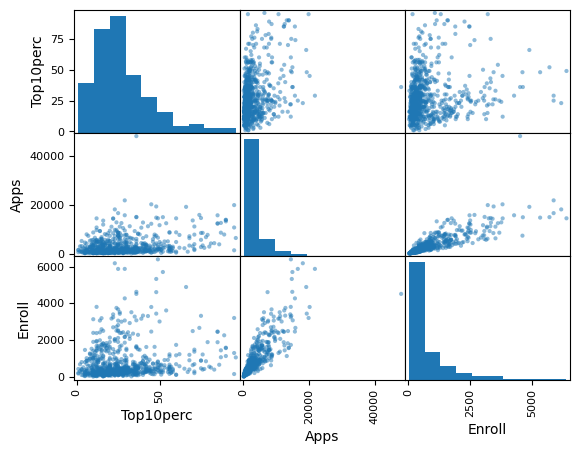

In [89]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

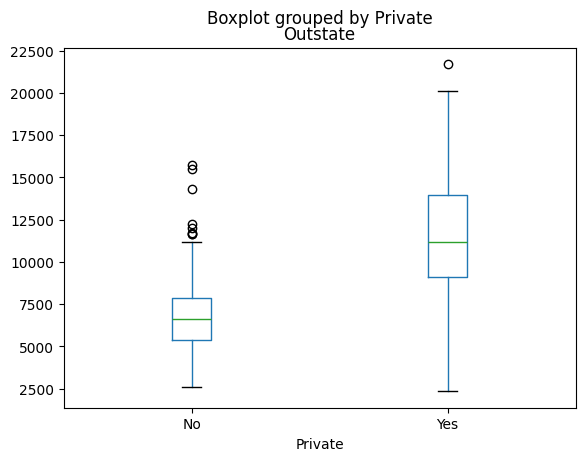

In [90]:
pd.plotting.boxplot(college, column="Outstate", by="Private", grid=False)


In [91]:
college["Elite"] = pd.cut(college["Top10perc"], bins=[0, 50, 100], labels=["No", "Yes"])

college["Elite"].value_counts()



Elite
No     699
Yes     78
Name: count, dtype: int64

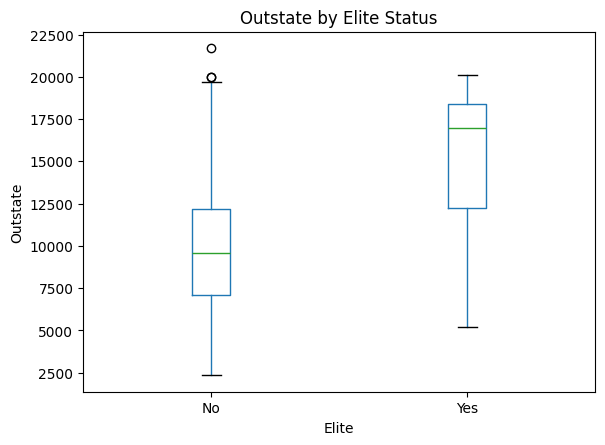

In [96]:
college.boxplot(column="Outstate", by="Elite", grid=False)
plt.title("Outstate by Elite Status")
plt.suptitle("")
plt.xlabel("Elite")
plt.ylabel("Outstate")
plt.show()

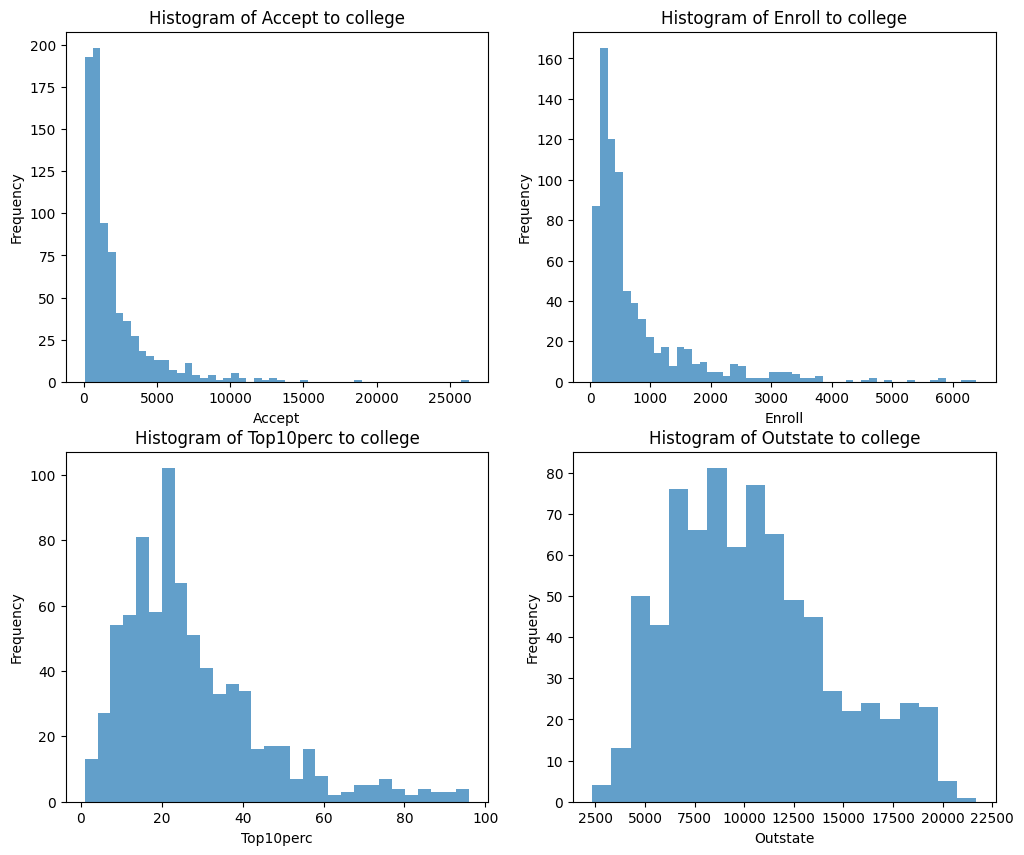

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
colums_plot = ["Accept", "Enroll", "Top10perc", "Outstate"]
diff_bins = [50, 50, 30, 20]
axes = axes.flatten()

for i, col in enumerate(colums_plot):
    college[col].plot.hist(ax=axes[i], bins=diff_bins[i], alpha=0.7)
    axes[i].set_title(f'Histogram of {col} to college')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()



College
Texas Southern University                    10
Montreat-Anderson College                    15
Alaska Pacific University                    15
Brewton-Parker College                       18
Mount Saint Clare College                    21
Huron University                             21
Claflin College                              21
Ferrum College                               22
Fayetteville State University                24
Centenary College                            24
Lamar University                             26
Jersey City State College                    26
Missouri Valley College                      27
University of Texas at Arlington             29
Gardner Webb University                      29
Virginia Union University                    30
University of Louisville                     31
Piedmont College                             31
Virginia State University                    31
McMurry University                           32
Brigham Young University at Prov

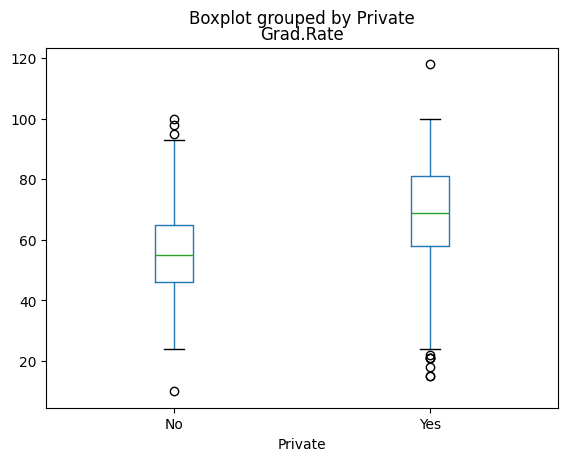

In [175]:
#college.plot.(y="Expend", x="Grad.Rate")
college.boxplot(column="Grad.Rate", by="Private", grid=False)

print(college["Grad.Rate"].sort_values(ascending=True).head(50))